In [1]:
# LINEAR REGRESSION


In [2]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot

In [3]:
companies = pd.read_csv('1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
len(companies)

1000

In [5]:
companies['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
companies.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
# CONVERT STATE COLUMN DTYPE FROM OBJECT TO CATEGORY
companies['State'] = companies['State'].astype('category')
companies.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [8]:
# CAT CODES (CATEGORY CODES)
companies['State'] = companies['State'].cat.codes
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [9]:
# EXTRACTING INDEPENDENT AND DEPENDENT VARIABLES
companies.iloc[:,:-1]
#companies.iloc[:,1:]

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,2
1,162597.70,151377.590,443898.5300,0
2,153441.51,101145.550,407934.5400,1
3,144372.41,118671.850,383199.6200,2
4,142107.34,91391.770,366168.4200,1
...,...,...,...,...
995,54135.00,118451.999,173232.6695,0
996,134970.00,130390.080,329204.0228,0
997,100275.47,241926.310,227142.8200,0
998,128456.23,321652.140,281692.3200,0


In [10]:
companies.iloc[:,4]

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [11]:
X = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values

In [12]:
# ENCODING CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

onehotencoder = OneHotEncoder(categories='auto')
X = onehotencoder.fit_transform(X).toarray()
X

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
# AVOIDING DUMMY DATA TRAP
X = X[:,1:]
X

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
companies.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,2,192261.83
1,162597.7,151377.59,443898.53,0,191792.06


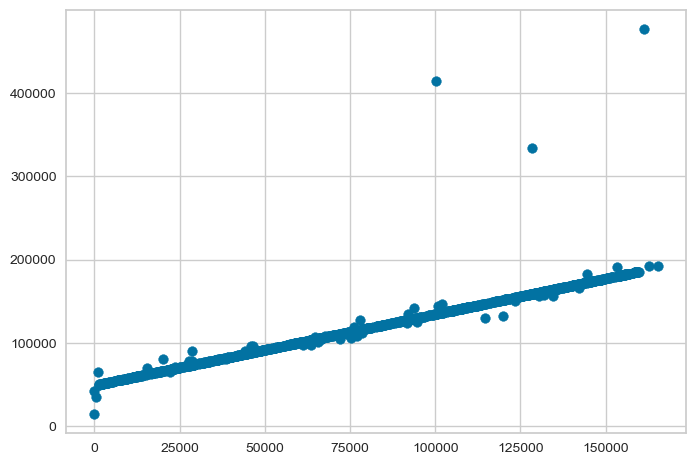

In [15]:
# LINEAR RELATIONSHIP BETWEEN FEATURES AND TARGET

plt.scatter(companies['R&D Spend'],companies['Profit'])

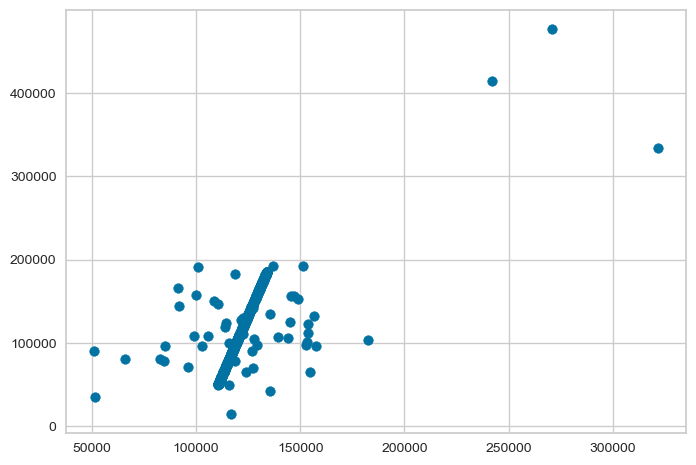

In [16]:
plt.scatter(companies["Administration"],companies['Profit'])

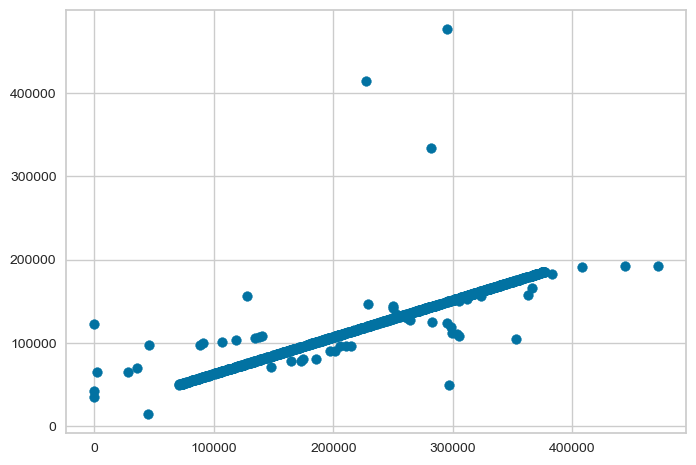

In [17]:
plt.scatter(companies['Marketing Spend'],companies['Profit'])

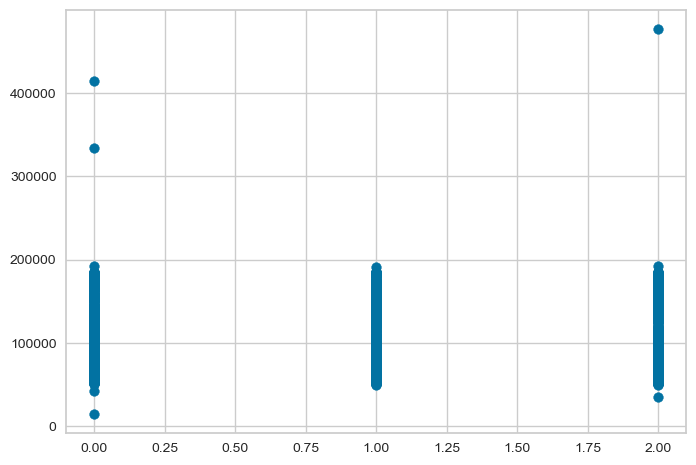

In [18]:
plt.scatter(companies['State'],companies['Profit'])

In [19]:
# LITTLE OR NO COLINEARITY BETWEEN THE FEATURES

companies.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.582434,0.978407,-0.001360,0.945245
Administration,0.582434,1.000000,0.520465,-0.018386,0.741560
Marketing Spend,0.978407,0.520465,1.000000,-0.001420,0.917270
State,-0.001360,-0.018386,-0.001420,1.000000,-0.005718
Profit,0.945245,0.741560,0.917270,-0.005718,1.000000


<Axes: >

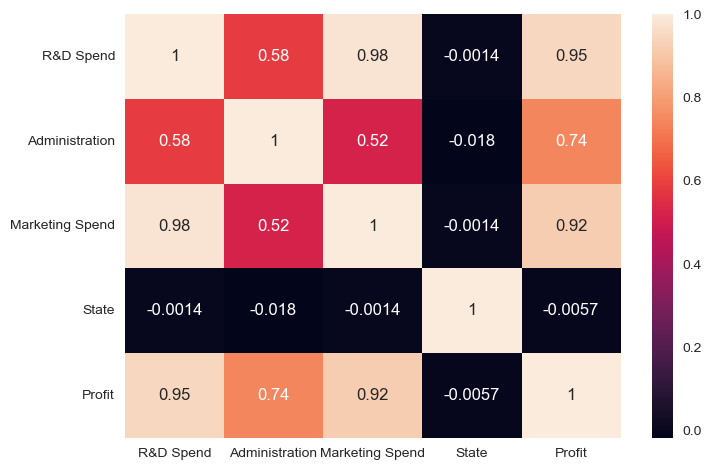

In [20]:
sns.heatmap(companies.corr(),annot=True)

# HOMOSCEDACITY ASSUMPTION

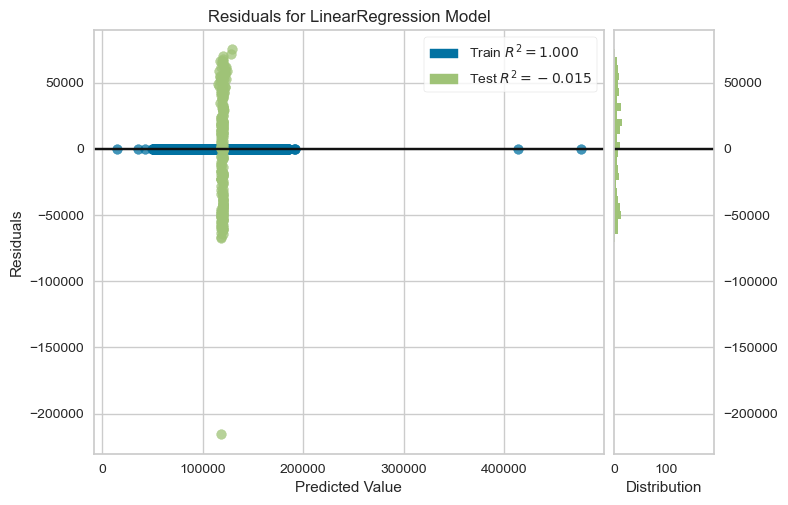

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [21]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# INSTANTIATE THE LINEAR MODEL AND VISUALIZER
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # FIT THE TRAINING DATA TO THE VISUALIZER
visualizer.score(X_test, y_test)  # EVALUATE THE MODEL ON THE TEST DATA
visualizer.show()                # DRAW/SHOW/PROOF THE DATA

# NORMAL DISTRIBUTION OF ERROR TERMS


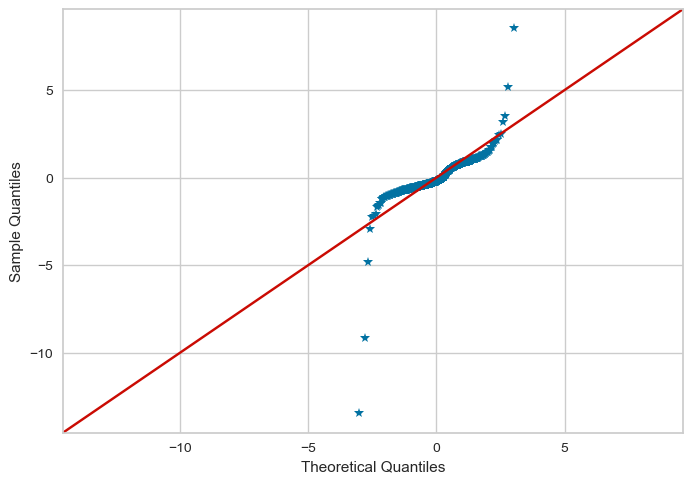

In [22]:
# ORDINARY LEAST SQUARES (OLS)
lin_reg = sm.OLS(y_train,X_train).fit()
res = lin_reg.resid
sm.qqplot(res, fit = True, line = '45', marker = '*')
plt.show()

# LITTLE OR NO CORELATION IN THE RESIDUALS

In [23]:
lin_reg = sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.615e+24
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           4.20e-13
Time:                        12:10:34   Log-Likelihood:                 15620.
No. Observations:                 800   AIC:                        -2.964e+04
Df Residuals:                       1   BIC:                        -2.590e+04
Df Model:                         798                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.268e+04   1.15e-08  -1.97e+12      0.000   -2.27e+04   -2.27e+04
x2         -1.805e+04   9.12e-09  -1.98e+12      0.000   -1.81e+04   -1.81e+04
const      -1.655e-10   1.42e-20  -1.17e+10      0.000   -1.66e-10   -1.66e-10
x3         -2.299e+04   9.12e-09  -2.52e+12      0.000    -2.3e+04    -2.3e+04
x4          -2.32e+04    9.4e-09  -2.47e+12      0.000   -2.32e+04   -2.32e+04
x5         -2.288e+04   9.12e-09  -2.51e+12      0.000   -2.29e+04   -2.29e+04
x6         -2.287e+04    9.4e-09  -2.43e+12      0.000   -2.29e+04   -2.29e+04
x7         -2.195e+04   7.55e-09  -2.91e+12      0.000    -2.2e+04    -2.2e+04
x8         -2.195e+04   7.55e-09  -2.91e+12      0.000   -2.19e+04   -2.19e+04
x9         -2.261e+04   9.12e-09  -2.48e+12      0.000   -2.26e+04   -2.26e+04
x10         -2.26e+04    9.4e-09   -2.4e+12      0.000   -2.26e+04   -2.26e+04
x11        -3.018e-10   1.57e-22  -1.93e+12      0.000   -3.02e-10   -3.02e-10
x12        -2.259e+04   9.12e-09  -2.48e+12      0.000   -2.26e+04   -2.26e+04
x13        -2.184e+04   7.55e-09  -2.89e+12      0.000   -2.18e+04   -2.18e+04
x14        -2.247e+04   9.12e-09  -2.46e+12      0.000   -2.25e+04   -2.25e+04
x15        -2.172e+04   7.55e-09  -2.88e+12      0.000   -2.17e+04   -2.17e+04
x16        -2.164e+04   7.55e-09  -2.87e+12      0.000   -2.16e+04   -2.16e+04
x17        -2.233e+04   9.12e-09  -2.45e+12      0.000   -2.23e+04   -2.23e+04
x18        -2.229e+04   9.12e-09  -2.44e+12      0.000   -2.23e+04   -2.23e+04
x19        -2.227e+04    9.4e-09  -2.37e+12      0.000   -2.23e+04   -2.23e+04
x20        -2.151e+04   7.55e-09  -2.85e+12      0.000   -2.15e+04   -2.15e+04
x21        -2.145e+04   7.55e-09  -2.84e+12      0.000   -2.15e+04   -2.15e+04
x22         5.903e-11   1.67e-23   3.54e+12      0.000     5.9e-11     5.9e-11
x23        -2.137e+04   7.55e-09  -2.83e+12      0.000   -2.14e+04   -2.14e+04
x24        -2.197e+04   9.12e-09  -2.41e+12      0.000    -2.2e+04    -2.2e+04
x25        -1.942e-11   1.68e-23  -1.16e+12      0.000   -1.94e-11   -1.94e-11
x26         -2.19e+04   9.12e-09   -2.4e+12      0.000   -2.19e+04   -2.19e+04
x27        -2.187e+04    9.4e-09  -2.33e+12      0.000   -2.19e+04   -2.19e+04
x28        -2.107e+04   7.55e-09  -2.79e+12      0.000   -2.11e+04   -2.11e+04
x29        -2.167e+04    9.4e-09  -2.31e+12      0.000   -2.17e+04   -2.17e+04
x30          5.44e-13   1.65e-23   3.29e+10      0.000    5.44e-13    5.44e-13
x31        -2.163e+04    9.4e-09   -2.3e+12      0.000   -2.16e+04   -2.16e+04
x32        -3.403e-11   1.61e-23  -2.11e+12      0.000    -3.4e-11    -3.4e-11
x33         1.709e-11   1.84e-23   9.31e+11      0.000    1.71e-11    1.71e-11
x34        -2.138e+04   9.12e-09  -2.35e+12      0.000   -2.14e+04   -2.14e+04
x35        -6.517e-11    1.8e-23  -3.61e+12      0.000   -6.52e-11   -6.52e-11
x3

# SPLITTING THE DATASET INTO TRAIN AND TEST

In [24]:
len_ = len(companies)
split = int(len_*0.70)
train, test = companies[0:split], companies[split:]

In [25]:
len(train), len(test)

(700, 300)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=45555)

In [27]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [28]:
X_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

# FITTING THE MODEL TO TRAINING SET

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

# PREDICTING THE DATASET

In [30]:
y_pred = lin_reg.predict(X_test)
#y_pred

In [31]:
#y_test

# FINDING THE COEFFICIENTS AND INTERCEPTS

In [32]:
# COEFFICIENT
print(lin_reg.coef_)

[-18239.33742652   -276.60235981 -22215.17854565 ...   -902.32353847
    245.92145905    245.92145905]


In [33]:
# INTERCEPTS
print(lin_reg.intercept_)

119471.97827219726


# EVELUATING THE MODEL

In [34]:
# CALCULATING THE R SQUARED ERROR
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.010709462477831444

In [35]:
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Variance score: -0.01
